### Text Representation

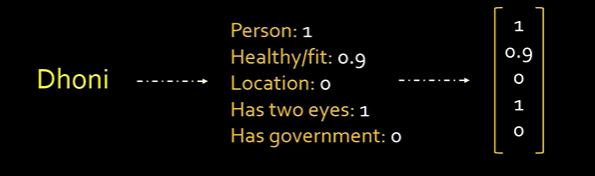

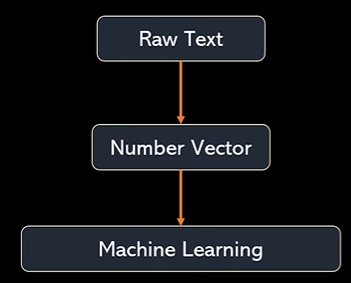

* Feature Engineering is a process of extracting features from raw data. In NLP it also called as Text Representation.

* Representing text as a vector is also known as Vector Space Model.

* There are various approches of connverting text into vector.

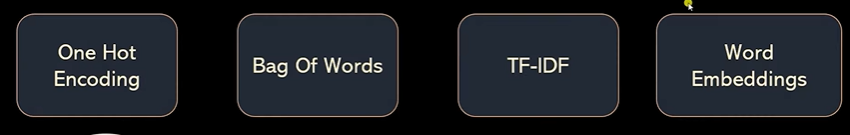

### Bag of Words

* The Bag-of-Words (BoW) model is a simple and widely used technique for text representation in Natural Language Processing (NLP). It represents a document as an unordered set of words, ignoring grammar and word order but keeping track of word frequency.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("C:/Users/Damodhara/Desktop/DSMP Dataset/spam.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [5]:
df['spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0 )

In [6]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df.Message, df.spam, test_size=0.2)

In [8]:
X_train

1519        Shall i ask one thing if you dont mistake me.
4606    I need an 8th but I'm off campus atm, could I ...
624     sorry, no, have got few things to do. may be i...
5269    If you don't, your prize will go to another cu...
258                  Where are you lover ? I need you ...
                              ...                        
5499        Now get step 2 outta the way. Congrats again.
5069                           Talk to g and x about that
4160             Now got tv 2 watch meh? U no work today?
4806                     Sorry for the delay. Yes masters
1361    Yo dude guess who just got arrested the other day
Name: Message, Length: 4457, dtype: object

In [9]:
y_train

1519    0
4606    0
624     0
5269    1
258     0
       ..
5499    0
5069    0
4160    0
4806    0
1361    0
Name: spam, Length: 4457, dtype: int64

In [10]:
type(X_train)

pandas.core.series.Series

In [11]:
type(y_train)

pandas.core.series.Series

In [12]:
#importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
v=CountVectorizer()
X_tran_cv=v.fit_transform(X_train.values)

In [14]:
X_tran_cv

<4457x7666 sparse matrix of type '<class 'numpy.int64'>'
	with 59188 stored elements in Compressed Sparse Row format>

In [15]:
X_tran_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
X_tran_cv.shape

(4457, 7666)

In [17]:
v.get_feature_names_out()[1000:1050]

array(['anythiing', 'anythin', 'anything', 'anythingtomorrow', 'anytime',
       'anyway', 'anyways', 'anywhere', 'apart', 'apartment', 'apes',
       'aphex', 'apnt', 'apo', 'apologise', 'apologize', 'apology', 'app',
       'apparently', 'appear', 'applausestore', 'applebees', 'apples',
       'application', 'apply', 'applyed', 'applying', 'appointment',
       'appointments', 'appreciate', 'appreciated', 'approaches',
       'approaching', 'approve', 'approved', 'approx', 'apps', 'appt',
       'appy', 'april', 'aproach', 'aptitude', 'aquarius', 'ar', 'arab',
       'arabian', 'arcade', 'archive', 'ard', 'are'], dtype=object)

In [18]:
v.get_feature_names_out().shape

(7666,)

In [19]:
X_train_np=X_tran_cv.toarray()
X_train_np[:4]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
X_train_np[:4][0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
np.where(X_train_np[0]!=0)

(array([1093, 2399, 3566, 4370, 4482, 4896, 5991, 6772, 7628], dtype=int64),)

In [22]:
np.where(X_train_np[0]!=0)

(array([1093, 2399, 3566, 4370, 4482, 4896, 5991, 6772, 7628], dtype=int64),)

In [23]:
#importing naive bayes model
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
model.fit(X_tran_cv, y_train)

MultinomialNB()

In [24]:
X_test_cv=v.transform(X_test)

In [25]:
from sklearn.metrics import classification_report 
y_pred=model.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       0.98      0.93      0.95       139

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [26]:
emails=[
    "Hey mohan, can we get together to watch footbal game tommorow?",
    "Upto 20% discount on parking, exclusive offer just for you. Dont miss this rewaed!"
]

In [27]:
emails_count=v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [28]:
#prediction using sklearn pipeline
from sklearn.pipeline import Pipeline

clf=Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [29]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [30]:
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       0.98      0.93      0.95       139

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

